## About this Dataset - Car Evaluation using Decision Tree
Car Evaluation Database was derived from a simple hierarchical decision model developed for the demonstration of  decision making.

The model evaluates cars according to the following concept structure:

CAR - car acceptability,
PRICE - overall price,
buying - buying price,
maint - price of the maintenance,
TECH - technical characteristics,
COMFORT - comfort,
doors - number of doors

### About this file
1728 rows
6 columns (input variables).
Target variable- class values

### Attributes:

buying: vhigh, high, med, low.

maint: vhigh, high, med, low.

doors: 2, 3, 4, 5more.

persons: 2, 4, more.

lug_boot: small, med, big.

safety: low, med, high.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\car_evaluation_Gini.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']  #isolationS
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [11]:
#Declare the feature vector and target variables:
X=df.drop(['class'],axis=1)
y=df['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=100)


In [13]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [14]:
#pip install category_encoders

In [15]:
import category_encoders as ce #This is useful only when you need to encode all the categories
#Should have all the features in categorial

In [16]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1424,1,1,1,1,1,1
991,2,1,1,1,2,2
874,2,2,1,2,2,2
772,3,3,1,2,3,2
1644,1,3,1,1,3,3


In [18]:
#Import D.T. Classifier:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Gini Index:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.465\nsamples = 1157\nvalue = [266, 45, 801, 45]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.584\nsamples = 771\nvalue = [266, 45, 415, 45]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.624\nsamples = 522\nvalue = [266, 45, 166, 45]'),
 Text(0.2, 0.125, 'gini = 0.627\nsamples = 265\nvalue = [146, 45, 29, 45]'),
 Text(0.6, 0.125, 'gini = 0.498\nsamples = 257\nvalue = [120, 0, 137, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 249\nvalue = [0, 0, 249, 0]')]

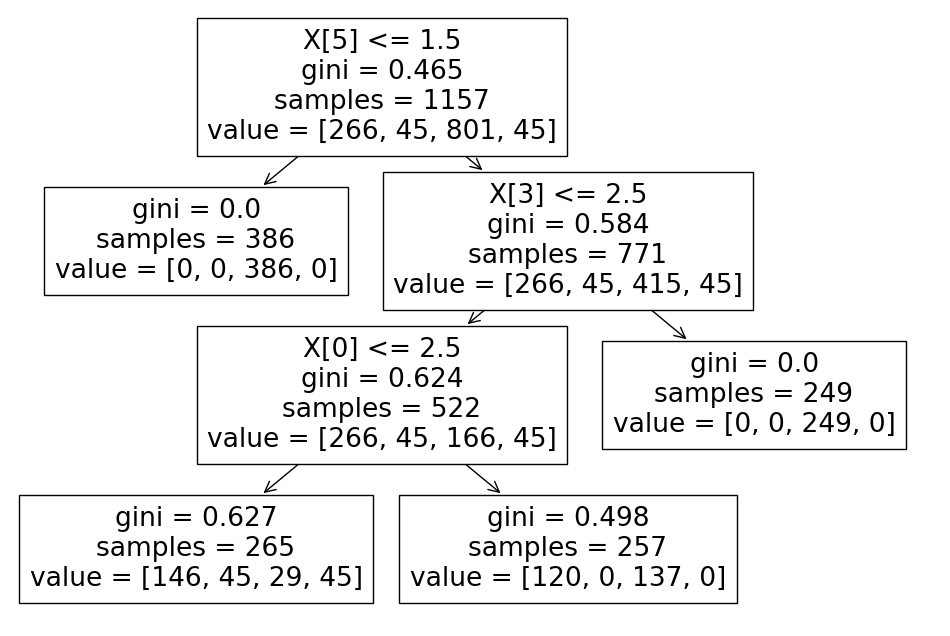

In [20]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [21]:
#Inference

In [22]:
#D.T. Enablement : (1) Information Gain (2) Gini Index
#Gini Index : D.T. uses CART and within CART the selection measure used by it is Gini Index.
#It uses Gini Method to create split points.
#Gini Index says that if
#We randomly select two items from a
#Population,they must be of same class and prob for this is 1
#if the population is pure.

In [23]:
#C is your number of classes and pi is the prob associated with the ith class.
#success or a failure
#SSB:?
#IAF:SSB:PABT:Split-Second Decision?

#IT creates binary splits(1 is of success and another is of failure)

In [25]:
#Predict the test set results:
y_pred_gini=clf_gini.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion gini index:{0:0.4f}")

Model accuracy score with criterion gini index:{0:0.4f}
